In [1]:
import pandas as pd
import numpy as np

import plotly.plotly as py
import plotly.graph_objs as go
import plotly
import plotly.io as pio

plotly.offline.init_notebook_mode()

## Data Processing (dataframe)

In [2]:
def get_action_type(s):
    return s.split('-')[-2]

In [3]:
resultFName = 'results20190910'
result_mat_path = '../neura-sparse01/explore-v2/{}.csv'.format(resultFName)
summary_output_path = '../neura-sparse01/explore-v2/summary.csv'

df = pd.read_csv(result_mat_path)
df['type'] = df['name'].apply(lambda s: s.split('-')[-2])
df['subj'] = df['name'].apply(lambda s: s.split('-')[1])
n1 = lambda x, y: ['{}{}'.format(x, i) for i in y]
n2 = lambda x: n1(x, [1,2,3])

for s in ['RMSE', 'Std', 'Mean', 'CorrCoef']:
    if not s == 'CorrCoef':
        df['anklePos{}'.format(s)] = np.mean(df[n2('LTIO{}_'.format(s))+n2('RTIO{}_'.format(s))], axis=1)
        df['ankleLPos{}'.format(s)] = np.mean(df[n2('LTIO{}_'.format(s))], axis=1)
        df['ankleRPos{}'.format(s)] = np.mean(df[n2('RTIO{}_'.format(s))], axis=1)
        df['kneePos{}'.format(s)] = np.mean(df[n2('LFEO{}_'.format(s))+n2('RFEO{}_'.format(s))], axis=1)
    df['kneeOriY{}'.format(s)] = np.mean(df[['qLKNE{}_2'.format(s), 'qRKNE{}_2'.format(s)]], axis=1)
    df['kneeLOriY{}'.format(s)] = np.mean(df[['qLKNE{}_2'.format(s)]], axis=1)
    df['kneeROriY{}'.format(s)] = np.mean(df[['qRKNE{}_2'.format(s)]], axis=1)
    df['hipOri{}'.format(s)] = np.mean(df[n2('qLHIP{}_'.format(s))+n2('qRHIP{}_'.format(s))], axis=1)
    for k, v in [('X', '1'), ('Y', '2'), ('Z', '3')]:
        df['hipOri{}{}'.format(k, s)] = np.mean(df[['qLHIP{}_{}'.format(s, v), 'qRHIP{}_{}'.format(s, v)]], axis=1)
    
df_nos3 = df[df['subj']!='S03']

# vanilla df_results
df_result = df.groupby(['type', 'label']).mean()
df_result2 = df.groupby(['type', 'label']).std()

# df_results no s3
df_result_nos3 = df_nos3.groupby(['type', 'label']).mean()
df_result2_nos3 = df_nos3.groupby(['type', 'label']).std()

for meandf, stddf in [(df_result, df_result2), (df_result_nos3, df_result2_nos3)]:
    meandf['runtimeStd'] = stddf['runtime']
    meandf['dOriStd'] = stddf['dOri']
    meandf['dPosStd'] = stddf['dPos']
    meandf['dPosWStd'] = stddf['dPosW']
    for s in ['RMSE', 'Std', 'Mean', 'CorrCoef']:
        if not s == 'CorrCoef':
            for t in ['anklePos', 'ankleLPos', 'ankleRPos', 'kneePos']:
                meandf['{}{}Std'.format(t,s)] = stddf['{}{}'.format(t,s)]
        for t in ['kneeOriY', 'kneeLOriY', 'kneeROriY', 'hipOri', 'hipOriX', 'hipOriY', 'hipOriZ']:
            meandf['{}{}Std'.format(t,s)] = stddf['{}{}'.format(t,s)]

df_result.to_csv(summary_output_path)

In [4]:
df.to_csv('../neura-sparse01/explore-v2/{}-2.csv'.format(resultFName))

In [5]:
df_result.head()

posMeanRMSE  \
type          label                                                            
FigureofEight NS2+Aw__sOw__sIw__v+Sav03+M76+C355                    0.029271   
              NS2+Aw__sOw__sIw__x+Sav03+M76+C355                    0.034057   
              NS2+Aw__vOw__vIw__v+Sav03+M76+C355                    0.022224   
              NS2+Aw__xOw__xIw__x+Sav03+M76+C355                    0.038049   
              NS2+lieekfv1+Aw__sOw__sIw__v+Sav03+P101+M125+C007     0.029812   

                                                                 posMeanMean  \
type          label                                                            
FigureofEight NS2+Aw__sOw__sIw__v+Sav03+M76+C355                    0.000388   
              NS2+Aw__sOw__sIw__x+Sav03+M76+C355                   -0.000634   
              NS2+Aw__vOw__vIw__v+Sav03+M76+C355                    0.000078   
              NS2+Aw__xOw__xIw__x+Sav03+M76+C355                    0.002082   
              NS2+lieekfv1+Aw__sOw__sIw__v+Sav03+P101+M125+C007     0.002289   

                                                                 oriMeanRMSE  \
type          label                                                            
FigureofEight NS2+Aw__sOw__sIw__v+Sav03+M76+C355                   11.557209   
              NS2+Aw__sOw__sIw__x+Sav03+M76+C355                   11.806718   
              NS2+Aw__vOw__vIw__v+Sav03+M76+C355                    6.975156   
              NS2+Aw__xOw__xIw__x+Sav03+M76+C355                   10.533819   
              NS2+lieekfv1+Aw__sOw__sIw__v+Sav03+P101+M125+C007    11.836802   

                                                                 oriMeanMean  \
type          label                                                            
FigureofEight NS2+Aw__sOw__sIw__v+Sav03+M76+C355                   -2.314374   
              NS2+Aw__sOw__sIw__x+Sav03+M76+C355                   -0.759418   
              NS2+Aw__vOw__vIw__v+Sav03+M76+C355                   -1.021779   
              NS2+Aw__xOw__xIw__x+Sav03+M76+C355                   -1.115815   
              NS2+lieekfv1+Aw__sOw__sIw__v+Sav03+P101+M125+C007     0.120738   

                                                                 MIDPELRMSE_1  \
type          label                                                             
FigureofEight NS2+Aw__sOw__sIw__v+Sav03+M76+C355                          0.0   
              NS2+Aw__sOw__sIw__x+Sav03+M76+C355                          0.0   
              NS2+Aw__vOw__vIw__v+Sav03+M76+C355                          0.0   
              NS2+Aw__xOw__xIw__x+Sav03+M76+C355                          0.0   
              NS2+lieekfv1+Aw__sOw__sIw__v+Sav03+P101+M125+C007           0.0   

                                                                 MIDPELRMSE_2  \
type          label                                                             
FigureofEight NS2+Aw__sOw__sIw__v+Sav03+M76+C355                          0.0   
              NS2+Aw__sOw__sIw__x+Sav03+M76+C355                          0.0   
              NS2+Aw__vOw__vIw__v+Sav03+M76+C355                          0.0   
              NS2+Aw__xOw__xIw__x+Sav03+M76+C355                          0.0   
              NS2+lieekfv1+Aw__sOw__sIw__v+Sav03+P101+M125+C007           0.0   

                                                                 MIDPELRMSE_3  \
type          label                                                             
FigureofEight NS2+Aw__sOw__sIw__v+Sav03+M76+C355                          0.0   
              NS2+Aw__sOw__sIw__x+Sav03+M76+C355                          0.0   
              NS2+Aw__vOw__vIw__v+Sav03+M76+C355                          0.0   
              NS2+Aw__xOw__xIw__x+Sav03+M76+C355                          0.0   
              NS2+lieekfv1+Aw__sOw__sIw__v+Sav03+P101+M125+C007           0.0   

                                                                 MIDPELStd_1  \
type          label                  

In [6]:
df_result_nos3.head()

posMeanRMSE  \
type          label                                                            
FigureofEight NS2+Aw__sOw__sIw__v+Sav03+M76+C355                    0.029932   
              NS2+Aw__sOw__sIw__x+Sav03+M76+C355                    0.034838   
              NS2+Aw__vOw__vIw__v+Sav03+M76+C355                    0.021330   
              NS2+Aw__xOw__xIw__x+Sav03+M76+C355                    0.036165   
              NS2+lieekfv1+Aw__sOw__sIw__v+Sav03+P101+M125+C007     0.030928   

                                                                 posMeanMean  \
type          label                                                            
FigureofEight NS2+Aw__sOw__sIw__v+Sav03+M76+C355                    0.000327   
              NS2+Aw__sOw__sIw__x+Sav03+M76+C355                   -0.000599   
              NS2+Aw__vOw__vIw__v+Sav03+M76+C355                   -0.000065   
              NS2+Aw__xOw__xIw__x+Sav03+M76+C355                    0.001674   
              NS2+lieekfv1+Aw__sOw__sIw__v+Sav03+P101+M125+C007     0.002302   

                                                                 oriMeanRMSE  \
type          label                                                            
FigureofEight NS2+Aw__sOw__sIw__v+Sav03+M76+C355                   11.722126   
              NS2+Aw__sOw__sIw__x+Sav03+M76+C355                   11.768784   
              NS2+Aw__vOw__vIw__v+Sav03+M76+C355                    6.722612   
              NS2+Aw__xOw__xIw__x+Sav03+M76+C355                   10.123164   
              NS2+lieekfv1+Aw__sOw__sIw__v+Sav03+P101+M125+C007    12.036762   

                                                                 oriMeanMean  \
type          label                                                            
FigureofEight NS2+Aw__sOw__sIw__v+Sav03+M76+C355                   -2.283903   
              NS2+Aw__sOw__sIw__x+Sav03+M76+C355                   -0.641164   
              NS2+Aw__vOw__vIw__v+Sav03+M76+C355                   -0.911927   
              NS2+Aw__xOw__xIw__x+Sav03+M76+C355                   -1.051081   
              NS2+lieekfv1+Aw__sOw__sIw__v+Sav03+P101+M125+C007     0.140200   

                                                                 MIDPELRMSE_1  \
type          label                                                             
FigureofEight NS2+Aw__sOw__sIw__v+Sav03+M76+C355                          0.0   
              NS2+Aw__sOw__sIw__x+Sav03+M76+C355                          0.0   
              NS2+Aw__vOw__vIw__v+Sav03+M76+C355                          0.0   
              NS2+Aw__xOw__xIw__x+Sav03+M76+C355                          0.0   
              NS2+lieekfv1+Aw__sOw__sIw__v+Sav03+P101+M125+C007           0.0   

                                                                 MIDPELRMSE_2  \
type          label                                                             
FigureofEight NS2+Aw__sOw__sIw__v+Sav03+M76+C355                          0.0   
              NS2+Aw__sOw__sIw__x+Sav03+M76+C355                          0.0   
              NS2+Aw__vOw__vIw__v+Sav03+M76+C355                          0.0   
              NS2+Aw__xOw__xIw__x+Sav03+M76+C355                          0.0   
              NS2+lieekfv1+Aw__sOw__sIw__v+Sav03+P101+M125+C007           0.0   

                                                                 MIDPELRMSE_3  \
type          label                                                             
FigureofEight NS2+Aw__sOw__sIw__v+Sav03+M76+C355                          0.0   
              NS2+Aw__sOw__sIw__x+Sav03+M76+C355                          0.0   
              NS2+Aw__vOw__vIw__v+Sav03+M76+C355                          0.0   
              NS2+Aw__xOw__xIw__x+Sav03+M76+C355                          0.0   
              NS2+lieekfv1+Aw__sOw__sIw__v+Sav03+P101+M125+C007           0.0   

                                                                 MIDPELStd_1  \
type          label                  

## Graph Reports

In [17]:
def plot_results(df_result, traces_name, target, title='', showstd=True, ylabel='rmse (m)', imgsize=(100,100), fontsize=12, xTypes = [], fname=''):
    # target2 = target.replace('RMSE', '').replace('Mean', '').replace('CorrCoef', '')
    colors = ['MediumPurple', '#FFED00', 'LightPink', 'MediumSlateBlue', 'Plum']
    traces = []
    for cIdx, k in enumerate(traces_name):
        v = traces_name[k]
        idx = (df_result.index.get_level_values('label') == v)
        
        df_buf = df_result.iloc[idx].reset_index(level='label')
        if len(xTypes) == 0:
            xTypesKeys = df_buf['{}'.format(target)].index.get_level_values('type').values
            xTypesVals = xTypesKeys
        else:
            xTypesKeys = list(xTypes.keys())
            xTypesVals = list(xTypes.values())
        df_buf2 = df_buf.loc[xTypesKeys]
        
        trace = go.Bar(
            x=xTypesVals,
            y=df_buf2['{}'.format(target)].values,
            name=k,
            error_y=dict(
                type='data',
                array=df_buf2['{}Std'.format(target)].values,
                visible=showstd
            ),
            marker_color=colors[cIdx%len(colors)]
        )
        traces.append(trace)

    layout = go.Layout(
        title=title,
        xaxis=dict(),
        yaxis=dict(
            title=ylabel,
        ),
        height=imgsize[0],
        width=imgsize[1],
        margin=dict(l=80,r=10,b=0,t=10,pad=4),
        legend=dict(orientation="h", xanchor="center", x=0.5, y=-.2),
        font=dict(size=fontsize),
        barmode='group'
    )
    fig = go.Figure(data=traces, layout=layout)
    plotly.offline.iplot(fig, filename='{}-bar.html'.format(target))
    
    if not fname == '':
        pio.write_image(fig, fname)

In [18]:
def plot_results2(df_result, traces_name, targets, title='', showstd=True, ylabel='rmse (m)', 
                  imgsize=(100,100), fontsize=12, yrange=False, xTypes = [], fname=''):
    colors = ['MediumPurple', '#FFED00', 'LightPink', 'MediumSlateBlue', 'Plum']
    traces = []
    cIdx = 0
    for l in targets:
        for k in traces_name:
            v = traces_name[k]
            target = targets[l]
            # target2 = target.replace('RMSE', '').replace('Mean', '').replace('CorrCoef', '')
            
            idx = (df_result.index.get_level_values('label') == v)

            df_buf = df_result.iloc[idx].reset_index(level='label')
            
            if len(xTypes) == 0:
                xTypesKeys = df_buf['{}'.format(target)].index.get_level_values('type').values
                xTypesVals = xTypesKeys
            else:
                xTypesKeys = list(xTypes.keys())
                xTypesVals = list(xTypes.values())
            df_buf2 = df_buf.loc[xTypesKeys]

            trace = go.Bar(
                x=xTypesVals,
                y=df_buf2['{}'.format(target)].values,
                name='{}{}'.format(k, l),
                error_y=dict(
                    type='data',
                    array=df_buf2['{}Std'.format(target)].values,
                    visible=showstd
                ),
                marker_color=colors[cIdx%len(colors)]
            )
            traces.append(trace)
            cIdx = cIdx + 1
            
    yDict = dict(title=ylabel)
    if yrange:
        yDict['range'] = yrange
        
    layout = go.Layout(
        title=title,
        xaxis=dict(),
        yaxis=yDict,
        height=imgsize[0],
        width=imgsize[1],
        margin=dict(l=80,r=10,b=0,t=10,pad=4),
        legend=dict(orientation="h", xanchor="center", x=0.5, y=-.2),
        font=dict(size=fontsize),
        barmode='group'
    )
    fig = go.Figure(data=traces, layout=layout)
    plotly.offline.iplot(fig, filename='{}-bar.html'.format(target))
    
    if not fname == '':
        pio.write_image(fig, fname)

## with respect the Vicon system

In [19]:
traces_name = {'LGKF-Vicon': 'NS2+lieekfv1+Aw__vOw__vIw__v+Sav03+P101+M125+C007',
               'CKF-3IMU (V)': 'NS2+Aw__sOw__sIw__v+Sav03+M76+C355',
               'LGKF-3IMU (V)': 'NS2+lieekfv1+Aw__sOw__sIw__v+Sav03+P101+M125+C007',
               'LGKF-OSPS': 'NS2+lieekfv1+Aw__xOw__xIw__x+Sav03+P101+M125+C007',
               'CKF-3IMU (X)': 'NS2+Aw__sOw__sIw__x+Sav03+M76+C355',
               'LGKF-3IMU (X)': 'NS2+lieekfv1+Aw__sOw__sIw__x+Sav03+P101+M125+C007',
               }
xTypes = {'Walk': 'Walk', 'FigureofEight': 'Figure of eight', 
          'Zigzag': 'Zig-zag', 'Fivemin': '5-minute walk',
          'Jog': 'Jog', 'JumpingJacks': 'Jumping jacks', 'SpeedSkater': 'Speedskater', 'HighKneeJog': 'High knee jog'}
imgsize = (400, 400/9*16)
imgsize = (400, 800)

### ePos

In [20]:
plot_results(df_result, traces_name, 'dPos', title='', ylabel='meters', xTypes=xTypes, 
             showstd=True, imgsize=imgsize, fname='lgcekf-dposmean4.png')

### eOri

In [21]:
plot_results(df_result, traces_name, 'dOri', title='', ylabel='deg', xTypes=xTypes, 
             showstd=True, imgsize=imgsize, fname='lgcekf-dorimean4.png')

## Knee and Hip RMSE and CC

In [13]:
targets = {'knee Y': 'kneeOriYRMSE', 'hip Y':'hipOriYRMSE', 
           'hip X':'hipOriXRMSE', 'hip Z':'hipOriZRMSE'}
plot_results2(df_result, traces_name, targets, ylabel='deg', xTypes=xTypes,
              showstd=True, imgsize=imgsize, fname='lgcekf-kneehiprmse3.png')

In [22]:
traces_name = {'LG3V': 'NS2+lieekfv1+Aw__sOw__sIw__v+Sav03+P101+M125+C007',
               #'CK3': 'NS2+Aw__sOw__sIw__v+Sav03+M76+C355',
               'LG3X': 'NS2+lieekfv1+Aw__sOw__sIw__x+Sav03+P101+M125+C007',
               }
targets = {'knee Y': 'kneeOriYCorrCoef', 'hip Y':'hipOriYCorrCoef', 
           'hip X':'hipOriXCorrCoef', 'hip Z':'hipOriZCorrCoef'}
plot_results2(df_result, traces_name, targets, ylabel='deg', xTypes=xTypes, yrange=[0,1],
              showstd=True, imgsize=imgsize, fname='lgcekf-kneehipcc3.png')

In [20]:
for (a,b,c) in [(df, df_result, 'a'), (df_nos3, df_result_nos3, 'b')]:
    idx = [i in ['Walk', 'FigureofEight', 'Zigzag', 'Fivemin'] for i in a['type']]
    df_walk = a.iloc[idx].groupby(['label']).mean()
    df_walk2 = a.iloc[idx].groupby(['label']).std()
    df_walk['type'] = 'All walking'

    idx = [i in ['Static', 'Walk', 'FigureofEight', 'Zigzag', 'Fivemin'] for i in a['type']]
    df_nondyn = a.iloc[idx].groupby(['label']).mean()
    df_nondyn2 = a.iloc[idx].groupby(['label']).std()
    df_nondyn['type'] = 'All nondynamic'

    for meandf, stddf in [(df_walk, df_walk2), (df_nondyn, df_nondyn2)]:
        meandf['runtimeStd'] = stddf['runtime']
        meandf['dOriStd'] = stddf['dOri']
        meandf['dPosStd'] = stddf['dPos']
        for s in ['RMSE', 'Std', 'Mean', 'CorrCoef']:
            if not s == 'CorrCoef':
                for t in ['anklePos', 'ankleLPos', 'ankleRPos', 'kneePos']:
                    meandf['{}{}Std'.format(t,s)] = stddf['{}{}'.format(t,s)]
            for t in ['kneeOriY', 'kneeLOriY', 'kneeROriY', 'hipOri', 'hipOriX', 'hipOriY', 'hipOriZ']:
                meandf['{}{}Std'.format(t,s)] = stddf['{}{}'.format(t,s)]

    df_csv = pd.concat([b.reset_index(), df_walk.reset_index(), df_nondyn.reset_index()])
    inv_map = {v: k for k, v in traces_name.items()}
    df_csv['label'] = df_csv['label'].apply(lambda s: inv_map[s] if s in inv_map else s)
    df_csv.to_csv('../neura-sparse01/explore-v2/{}-3{}.csv'.format(resultFName, c))

C:\Users\syluk\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




## Technical Paper plots

In [7]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.pyplot import figure
from matplotlib import rc
import pandas as pd
import numpy as np

In [11]:
df_target = df_result_nos3
traces_name = {"$\it{LGKF}$-$\it{OSPS}$": 'NS2+lieekfv1+Aw__xOw__xIw__x+Sav03+P101+M125+C007',
               "$\it{LGKF}$-$\it{3IMU}$": 'NS2+lieekfv1+Aw__sOw__sIw__x+Sav03+P101+M125+C007',
               "$\it{CKF}$-$\it{3IMU}$": 'NS2+Aw__sOw__sIw__x+Sav03+M76+C355',
               #"$\it{OSPS}$": 'NS2+viconvsxsens',
               }
xTypes = {'Free walk': ['Walk', 'FigureofEight', 'Zigzag', 'Fivemin'],
          'Speedskater': 'SpeedSkater',
          'Jog': 'Jog', 'Jumping jacks': 'JumpingJacks', 'High knee jog': 'HighKneeJog', }
traces2_name = {'knee Y': 'kneeOriY', 'hip Y': 'hipOriY', 'hip X': 'hipOriX', 'hip Z': 'hipOriZ'}
targets2 = ["$\it{LGKF}$-$\it{3IMU}$"]
traces2_targets = [traces_name[i] for i in targets2]
traces3_targets = {"$\it{LG}$": 'NS2+lieekfv1+Aw__sOw__sIw__x+Sav03+P101+M125+C007',
                   "$\it{C}$": 'NS2+Aw__sOw__sIw__x+Sav03+M76+C355'}

iterables = [xTypes.keys(), traces_name.keys()]    
df_plot = pd.DataFrame(index = pd.MultiIndex.from_product(iterables, names=['type', 'label']), 
                       columns = df_target.columns)

iterables = [xTypes.keys(), traces2_name.keys()]
columns = ["RMSE", "RMSEStd", "CorrCoef", "CorrCoefStd"]
df_plot2 = pd.DataFrame(index = pd.MultiIndex.from_product(iterables, names=['type', 'label']), 
                       columns = columns)

iterables = [xTypes.keys(), ["{} {}".format(j, i) for i in traces2_name for j in traces3_targets]]
df_plot3 = pd.DataFrame(index = pd.MultiIndex.from_product(iterables, names=['type', 'label']), 
                       columns = columns)

for i in xTypes:
    for j in traces_name:
        buf = df_target.loc[(xTypes[i], traces_name[j]), :]
        if len(buf.shape) == 1:
            df_plot.loc[(i, j)] = buf
        else:
            df_plot.loc[(i, j)] = buf.mean()
    for j in targets2:
        for k in traces2_name:
            buf = df_target.loc[(xTypes[i], traces_name[j]), ["{}{}".format(traces2_name[k], l) for l in columns]]
            if len(buf.shape) == 1:
                df_plot2.loc[(i, k)] = buf.values
            else:
                df_plot2.loc[(i, k)] = buf.mean().values
            
    for j in traces3_targets:
        for k in traces2_name:
            buf = df_target.loc[(xTypes[i], traces3_targets[j]), ["{}{}".format(traces2_name[k], l) for l in columns]]
            targetBuf = "{} {}".format(j, k)
            if len(buf.shape) == 1:
                df_plot3.loc[(i, targetBuf)] = buf.values
            else:
                df_plot3.loc[(i, targetBuf)] = buf.mean().values
            
# adjust unit
for i in ['dPos', 'dPosStd']:
    df_plot.loc[:, i] = 100*df_plot.loc[:, i]

In [12]:
df_plot.loc[:,['dPos', 'dPosStd', 'dOri', 'dOriStd']]

dPos  dPosStd     dOri  dOriStd
type          label                                                      
Free walk     $\it{LGKF}$-$\it{OSPS}$  6.51245  3.52023  19.7963  8.97721
              $\it{LGKF}$-$\it{3IMU}$  6.28962   2.0797   17.106  5.24261
              $\it{CKF}$-$\it{3IMU}$   6.14412  1.74009  16.8559  4.83781
Speedskater   $\it{LGKF}$-$\it{OSPS}$  13.2157  2.56513  33.2934  5.38862
              $\it{LGKF}$-$\it{3IMU}$  14.3726  3.04467  32.3211  6.73754
              $\it{CKF}$-$\it{3IMU}$   15.2287  2.90903  34.1738  6.37632
Jog           $\it{LGKF}$-$\it{OSPS}$   9.2695  1.50966  22.6835  4.09273
              $\it{LGKF}$-$\it{3IMU}$  9.91696  1.19988  21.5559  3.03877
              $\it{CKF}$-$\it{3IMU}$   12.6563  1.53231  27.1711  4.19669
Jumping jacks $\it{LGKF}$-$\it{OSPS}$  8.25651  1.52414  20.0133  3.79109
              $\it{LGKF}$-$\it{3IMU}$  9.12509  1.84115  19.3456   3.7073
              $\it{CKF}$-$\it{3IMU}$   11.7958  3.08225  24.2286  6.57492
High knee jog $\it{LGKF}$-$\it{OSPS}$  15.0124  4.46147  37.0788  10.4668
              $\it{LGKF}$-$\it{3IMU}$  15.0784  5.78061  36.9812  12.1909
              $\it{CKF}$-$\it{3IMU}$   23.4177  6.08941  55.0467  14.4402

In [13]:
df_plot3

RMSE  RMSEStd   CorrCoef CorrCoefStd
type          label                                                    
Free walk     $\it{LG}$ knee Y  11.9374  3.85412   0.846289    0.100633
              $\it{C}$ knee Y   12.1342  2.96731   0.848723   0.0990889
              $\it{LG}$ hip Y   11.4218  3.88172   0.708945    0.137055
              $\it{C}$ hip Y    11.6335  2.93153   0.711511    0.139847
              $\it{LG}$ hip X   7.55308  3.57677   0.591127    0.187406
              $\it{C}$ hip X    7.41746  3.53677   0.577742    0.189152
              $\it{LG}$ hip Z   14.0605  5.58544   0.618017    0.141642
              $\it{C}$ hip Z    14.0229  5.35124   0.624837    0.140329
Speedskater   $\it{LG}$ knee Y  31.4403  8.14674   0.619233    0.101253
              $\it{C}$ knee Y   34.4571  7.74902   0.474469    0.100437
              $\it{LG}$ hip Y    30.723  10.5179    0.47643    0.146679
              $\it{C}$ hip Y    34.6041  11.7385   0.400253    0.164711
              $\it{LG}$ hip X   14.3896  5.76701   0.687524    0.142181
              $\it{C}$ hip X    14.5682  5.87534   0.682918    0.138432
              $\it{LG}$ hip Z   15.3426  6.45761   0.519013    0.130212
              $\it{C}$ hip Z    15.3162  5.86604   0.494583    0.110838
Jog           $\it{LG}$ knee Y  22.4747  4.02666   0.686122   0.0869062
              $\it{C}$ knee Y    30.189  4.68945   0.541208    0.103556
              $\it{LG}$ hip Y   21.9562  3.30166   0.499424    0.104078
              $\it{C}$ hip Y    29.8335  4.07654   0.297788    0.151279
              $\it{LG}$ hip X   8.03783  1.89673   0.467125    0.180578
              $\it{C}$ hip X    7.98992  2.04997   0.444035    0.182201
              $\it{LG}$ hip Z   10.6974  3.48932   0.563949    0.154216
              $\it{C}$ hip Z    10.6362  3.57698   0.591449    0.154286
Jumping jacks $\it{LG}$ knee Y  17.4571  3.48463   0.573134    0.139908
              $\it{C}$ knee Y   21.1954  6.18716   0.686656    0.120077
              $\it{LG}$ hip Y   18.1855  3.49781   0.324731     0.24204
              $\it{C}$ hip Y    23.0693  6.38055   0.419979    0.190474
              $\it{LG}$ hip X   5.98987  2.53674   0.787737     0.17776
              $\it{C}$ hip X    6.03721  2.48171   0.843386    0.111494
              $\it{LG}$ hip Z   9.67674  3.76099   0.557322    0.184873
              $\it{C}$ hip Z    9.20692  3.38135   0.579065    0.185917
High knee jog $\it{LG}$ knee Y  38.8455  18.4398   0.667191    0.268937
              $\it{C}$ knee Y   62.0486  18.4333   0.231094    0.386286
              $\it{LG}$ hip Y   37.8149  18.0391   0.507768    0.292741
              $\it{C}$ hip Y    60.4484  17.8298  -0.178287    0.504538
              $\it{LG}$ hip X   12.1022  2.50965   0.128247    0.235826
              $\it{C}$ hip X    13.0586  1.92051  -0.109889    0.189245
              $\it{LG}$ hip Z   16.7812  5.94929  0.0400822    0.271266
              $\it{C}$ hip Z    14.6217   5.1102   0.139884    0.289303

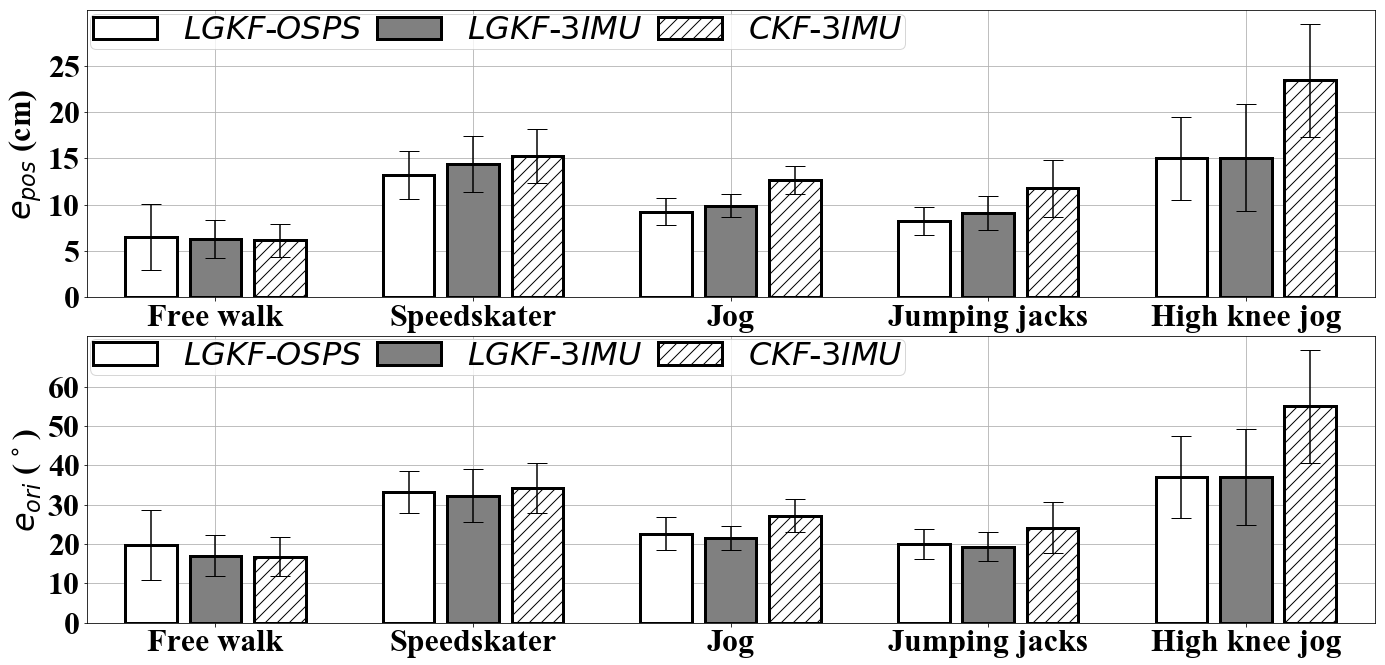

In [15]:
plt.rc('text', usetex=False)
plt.rc('font', family='Times New Roman', size=32)
#matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']

fig, (ax1, ax2) = plt.subplots(2, figsize=(20, 10))

barchart(ax1, df_plot, 'dPos')
ax1.set_yticks(range(0,30,5))
ax1.set_ylabel(r'$e_{pos}$ (cm)')
ax1.grid(True)
barchart(ax2, df_plot, 'dOri')
ax2.set_yticks(range(0,70,10))
ax2.set_ylabel(r'$e_{ori}$ ($^\circ$)')
ax2.grid(True)
ax1.legend(loc=2, ncol=4, borderpad=0.1, borderaxespad=0.1, labelspacing=0.1, columnspacing=0.5)
ax2.legend(loc=2, ncol=4, borderpad=0.1, borderaxespad=0.1, labelspacing=0.1, columnspacing=0.5)

fig.tight_layout(h_pad=0)
fig.savefig('lgcekf-dposdorimean-bw-xsens.png', dpi=300, transparent=False, bbox_inches='tight', pad_inches=0)

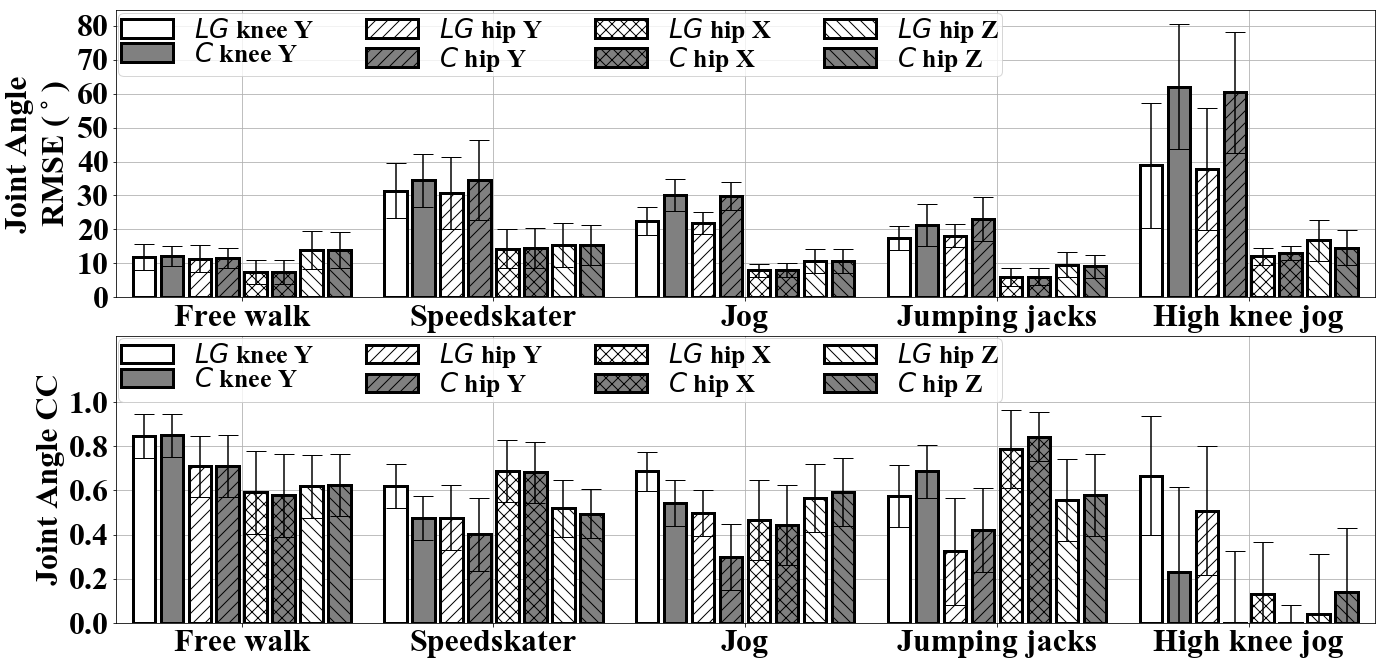

In [16]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(20, 10))

barchart(ax1, df_plot3, 'RMSE')
#ax1.set_yticks(range(0,30,5))
ax1.set_ylabel('Joint Angle\nRMSE ($^\circ$)')
ax1.set_yticks(np.arange(0,81,step=10))
ax1.grid(True)
barchart(ax2, df_plot3, 'CorrCoef')
ax2.set_ylabel('Joint Angle CC')
ax2.set_yticks(np.arange(0, 1.01, step=0.2))
ax2.set_ylim(0, 1.3)
ax2.grid(True)
ax1.legend(loc=2, ncol=4, borderpad=0.1, borderaxespad=0.1, labelspacing=0., prop={'size': 26})
ax2.legend(loc=2, ncol=4, borderpad=0.1, borderaxespad=0.1, labelspacing=0., prop={'size': 26})

fig.tight_layout(h_pad=0)
fig.savefig('lgcekf-kneehiprmsecc-bw2.png', dpi=300, transparent=False, bbox_inches='tight', pad_inches=0)

In [18]:
df_plot.loc[:,['dPos', 'dPosStd', 'dOri', 'dOriStd']]

dPos   dPosStd     dOri  dOriStd
type          label                                                        
Free walk     $\it{LGKF}$-$\it{Vicon}$  4.64741  0.981506  14.8723  3.27232
              $\it{LGKF}$-$\it{3IMU}$   5.75342   1.39062  19.8392   5.2123
              $\it{CKF}$-$\it{3IMU}$    5.21214   1.29757  18.8921  5.28452
              $\it{OSPS}$               6.28371   1.78288   22.969  12.0146
Speedskater   $\it{LGKF}$-$\it{Vicon}$  11.4373    3.4048  29.4992  8.11065
              $\it{LGKF}$-$\it{3IMU}$   11.5026   3.68156  31.3438  8.45973
              $\it{CKF}$-$\it{3IMU}$    12.2474   3.82009  33.1391  8.75383
              $\it{OSPS}$               7.18339   1.78857  16.4703  7.06879
Jog           $\it{LGKF}$-$\it{Vicon}$  7.31806   1.73749  20.7016  3.40464
              $\it{LGKF}$-$\it{3IMU}$   8.35851   1.61408  23.3742  5.08287
              $\it{CKF}$-$\it{3IMU}$    11.3864   1.50286  29.4459  4.69826
              $\it{OSPS}$               6.51315    1.3773  15.7882  4.90817
Jumping jacks $\it{LGKF}$-$\it{Vicon}$   6.3483   1.23574  20.6412  4.04302
              $\it{LGKF}$-$\it{3IMU}$   8.35207   1.52601  22.6734  5.14896
              $\it{CKF}$-$\it{3IMU}$    10.6505   2.94377  26.7393  7.07652
              $\it{OSPS}$               6.42801   1.85552   18.944  6.77002
High knee jog $\it{LGKF}$-$\it{Vicon}$  12.6139   4.25144  33.7029  9.04473
              $\it{LGKF}$-$\it{3IMU}$   13.0153   4.92934  34.2016  11.8319
              $\it{CKF}$-$\it{3IMU}$    20.8333   6.40678  52.6513  15.0005
              $\it{OSPS}$               6.54827    1.0591   16.082  4.22132

In [19]:
df_plot2

RMSE  RMSEStd   CorrCoef CorrCoefStd
type          label                                          
Free walk     knee Y  12.9937  3.47821    0.87407   0.0586976
              hip Y   11.1569  3.19867   0.768435    0.097777
              hip X   8.61101   3.7943   0.620908    0.110631
              hip Z   17.0387  4.41588   0.364331    0.121142
Speedskater   knee Y  23.9169  8.28458   0.688506     0.11897
              hip Y   28.1791  14.6754   0.505878     0.15887
              hip X    11.371  4.58987   0.676192    0.149701
              hip Z   18.7826  5.68352   0.257723    0.135291
Jog           knee Y  21.0389  4.80991   0.699949   0.0897799
              hip Y   21.3661  5.18097   0.568865   0.0861517
              hip X   8.76396   3.6826   0.501458    0.171693
              hip Z   14.8918  4.30218   0.413967    0.159235
Jumping jacks knee Y   16.286  3.09967   0.603386     0.13714
              hip Y   19.1905  4.19824  0.0916584    0.200119
              hip X   6.67464  2.89993   0.815006     0.11199
              hip Z   14.2358  5.45828   0.339451    0.228958
High knee jog knee Y  35.7506  17.1512   0.663341    0.264393
              hip Y   36.5887  16.6757   0.494106    0.279841
              hip X   11.1365  3.55498   0.277728    0.238758
              hip Z   15.7528  5.75827   0.190574    0.216353

In [11]:
df_plot3

RMSE  RMSEStd   CorrCoef CorrCoefStd
type          label                                                    
Free walk     $\it{LG}$ knee Y  13.0431  3.54601   0.876054   0.0590364
              $\it{C}$ knee Y   11.0893  2.98018   0.869267   0.0805063
              $\it{LG}$ hip Y   11.1252  3.27432   0.773368   0.0978371
              $\it{C}$ hip Y    11.7563  3.32714   0.735514    0.117824
              $\it{LG}$ hip X   8.64132  3.80707   0.619696    0.111013
              $\it{C}$ hip X    7.53981  3.10488   0.623766    0.120729
              $\it{LG}$ hip Z   17.0282  4.41209   0.365425    0.121088
              $\it{C}$ hip Z    17.4904  4.66915   0.333221     0.11717
Speedskater   $\it{LG}$ knee Y  23.2941  8.18188   0.692525    0.113889
              $\it{C}$ knee Y   27.2237  8.28871   0.537001    0.116785
              $\it{LG}$ hip Y   27.2377  14.4045   0.516603     0.16215
              $\it{C}$ hip Y    31.6732  16.3566     0.3939    0.182167
              $\it{LG}$ hip X   11.4093  4.50374   0.674898    0.150842
              $\it{C}$ hip X    11.6328  4.64531   0.643748    0.171273
              $\it{LG}$ hip Z   18.8255  5.68186   0.251993    0.135064
              $\it{C}$ hip Z    18.8524  5.51593   0.257199    0.137748
Jog           $\it{LG}$ knee Y  20.7094  4.63884   0.705887   0.0880717
              $\it{C}$ knee Y   27.2859  3.35586   0.578408   0.0808941
              $\it{LG}$ hip Y   21.0522  5.04167   0.575103   0.0849703
              $\it{C}$ hip Y    31.5179  4.88576   0.271774    0.154403
              $\it{LG}$ hip X   8.74178  3.69355   0.505568    0.171824
              $\it{C}$ hip X    7.77735  2.96482   0.453566     0.18402
              $\it{LG}$ hip Z   14.8807  4.29725    0.41593    0.158177
              $\it{C}$ hip Z    16.1865  5.03337    0.33269    0.143521
Jumping jacks $\it{LG}$ knee Y  16.1768  3.10539   0.604893    0.134808
              $\it{C}$ knee Y   19.7739  4.93894   0.696497   0.0821586
              $\it{LG}$ hip Y   19.0479  4.16467  0.0956905    0.202911
              $\it{C}$ hip Y    24.6328   7.7193  0.0739896     0.20189
              $\it{LG}$ hip X    6.7298  2.88298   0.814861    0.111101
              $\it{C}$ hip X    5.87865  2.47864   0.853144   0.0615066
              $\it{LG}$ hip Z   14.2759  5.45321   0.334411    0.229313
              $\it{C}$ hip Z    13.1641  5.13184   0.398262    0.230651
High knee jog $\it{LG}$ knee Y   35.055   16.561   0.674411    0.255912
              $\it{C}$ knee Y   58.1082  17.7431   0.196695    0.382833
              $\it{LG}$ hip Y   35.8595  16.0685   0.513059    0.265368
              $\it{C}$ hip Y    58.0363  17.1021  -0.225064     0.48851
              $\it{LG}$ hip X   11.0782  3.58992   0.284088    0.233086
              $\it{C}$ hip X    11.6572  3.81737 -0.0176909    0.221578
              $\it{LG}$ hip Z   15.7707  5.74405   0.187687    0.214852
              $\it{C}$ hip Z    16.8733  6.28336   0.106995    0.270679

In [14]:
def barchart(ax, df, target, width=1):
    typeList = list(df.index.get_level_values('type').unique())
    labelList = list(df.index.get_level_values('label').unique())
    typeListN, labelListN = len(typeList), len(labelList)

    cfgList = [(j,i) for i in ['', '//', 'xx', '\\\\'] for j in ['white', 'gray']]
    cfgListN = len(cfgList)

    x = np.arange(len(typeList)) * (len(labelList) + 1) 
    for i in range(0,labelListN):
        ax.bar(x+(i-1)*width, df.loc[(typeList,labelList[i]), target].values, 
               yerr = df.loc[(typeList,labelList[i]), '{}Std'.format(target)].values, 
               color=cfgList[i%cfgListN][0], error_kw = {'capsize': 10, 'zorder': 4},
               edgecolor='black', linewidth=3, zorder=3,
               hatch=cfgList[i%cfgListN][1], label=labelList[i])
    ax.set_xticks(x + labelListN/2 - 1.5)
    ax.set_xticklabels(typeList)
    ax.set_xlim([-2,typeListN*(labelListN+1)-2])

In [21]:
plt.rc('text', usetex=False)
plt.rc('font', family='Times New Roman', size=32)
#matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']

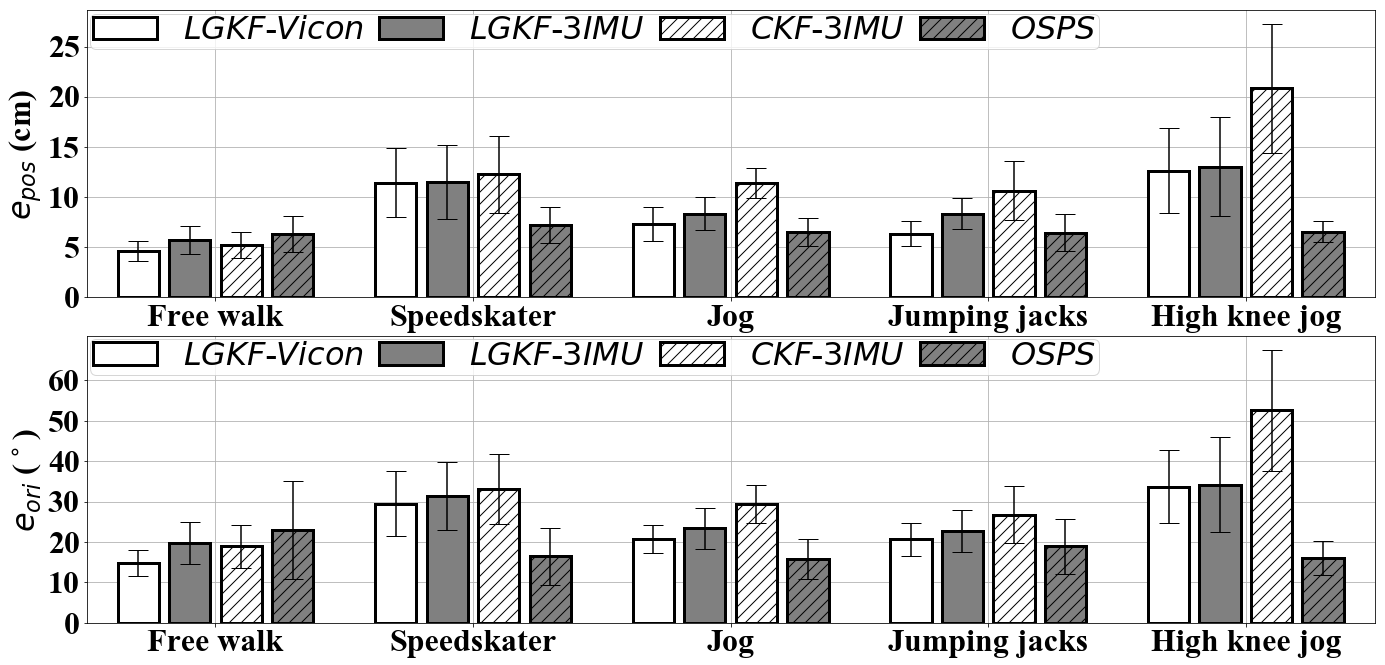

In [41]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(20, 10))

barchart(ax1, df_plot, 'dPos')
ax1.set_yticks(range(0,30,5))
ax1.set_ylabel(r'$e_{pos}$ (cm)')
ax1.grid(True)
barchart(ax2, df_plot, 'dOri')
ax2.set_yticks(range(0,70,10))
ax2.set_ylabel(r'$e_{ori}$ ($^\circ$)')
ax2.grid(True)
ax1.legend(loc=2, ncol=4, borderpad=0.1, borderaxespad=0.1, labelspacing=0.1, columnspacing=0.5)
ax2.legend(loc=2, ncol=4, borderpad=0.1, borderaxespad=0.1, labelspacing=0.1, columnspacing=0.5)

fig.tight_layout(h_pad=0)
fig.savefig('lgcekf-dposdorimean-bw.png', dpi=300, transparent=False, bbox_inches='tight', pad_inches=0)

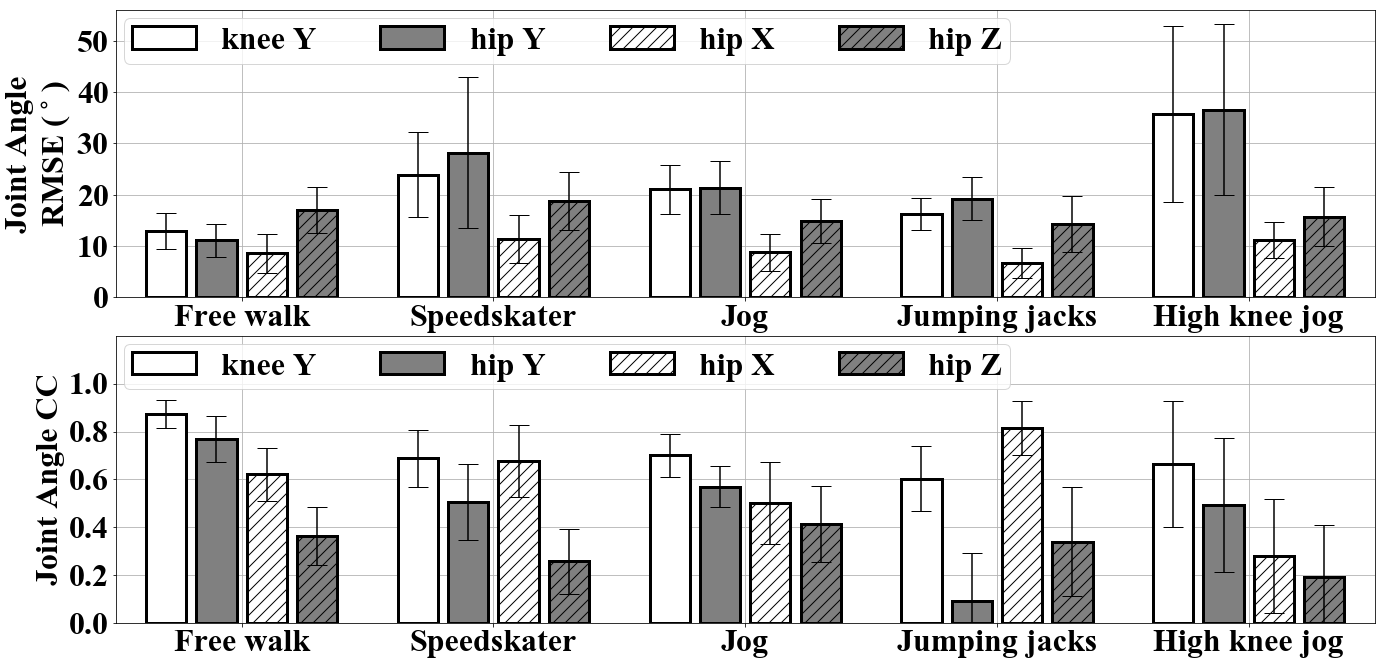

In [42]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(20, 10))

barchart(ax1, df_plot2, 'RMSE')
#ax1.set_yticks(range(0,30,5))
ax1.set_ylabel('Joint Angle\nRMSE ($^\circ$)')
ax1.set_yticks(np.arange(0,51,step=10))
ax1.grid(True)
barchart(ax2, df_plot2, 'CorrCoef')
ax2.set_ylabel('Joint Angle CC')
ax2.set_yticks(np.arange(0, 1.01, step=0.2))
ax2.set_ylim(0, 1.2)
ax2.grid(True)
ax1.legend(loc=2, ncol=4, borderpad=0.25, borderaxespad=0.25, labelspacing=0.1)
ax2.legend(loc=2, ncol=4, borderpad=0.25, borderaxespad=0.25, labelspacing=0.1)

fig.tight_layout(h_pad=0)
fig.savefig('lgcekf-kneehiprmsecc-bw1.png', dpi=300, transparent=False, bbox_inches='tight', pad_inches=0)

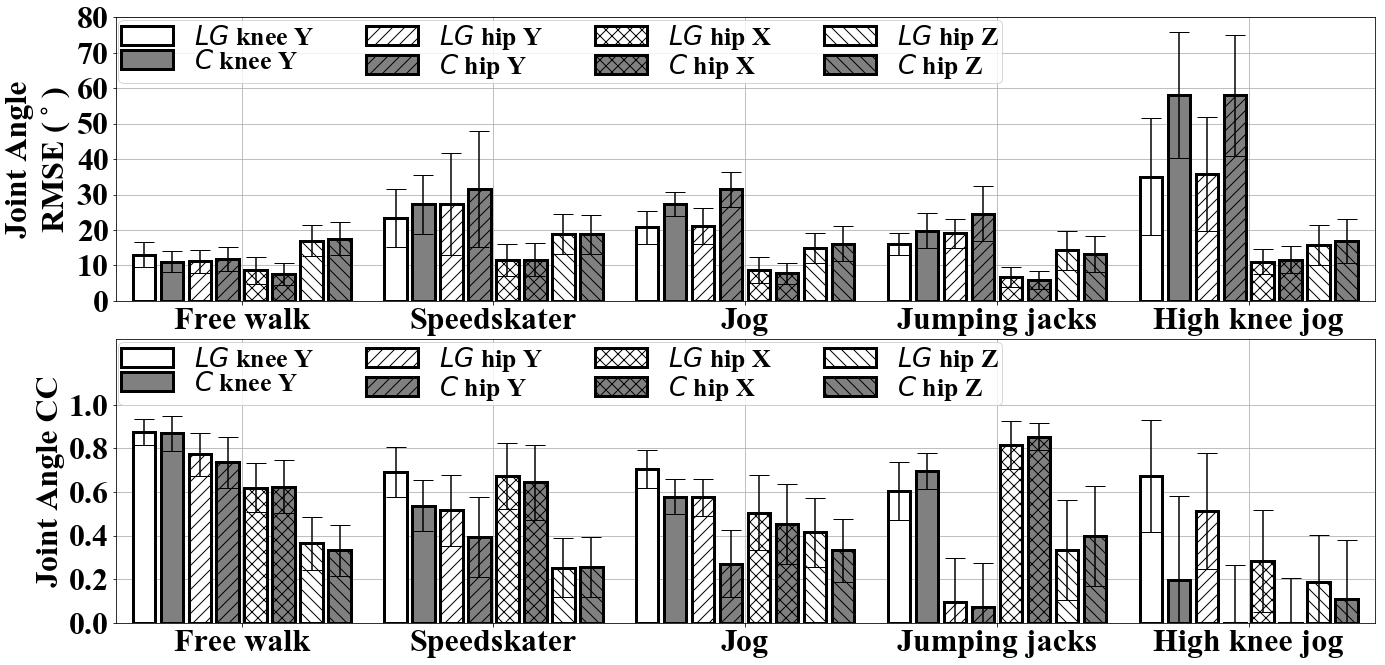

In [43]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(20, 10))

barchart(ax1, df_plot3, 'RMSE')
#ax1.set_yticks(range(0,30,5))
ax1.set_ylabel('Joint Angle\nRMSE ($^\circ$)')
ax1.set_yticks(np.arange(0,81,step=10))
ax1.grid(True)
barchart(ax2, df_plot3, 'CorrCoef')
ax2.set_ylabel('Joint Angle CC')
ax2.set_yticks(np.arange(0, 1.01, step=0.2))
ax2.set_ylim(0, 1.3)
ax2.grid(True)
ax1.legend(loc=2, ncol=4, borderpad=0.1, borderaxespad=0.1, labelspacing=0., prop={'size': 26})
ax2.legend(loc=2, ncol=4, borderpad=0.1, borderaxespad=0.1, labelspacing=0., prop={'size': 26})

fig.tight_layout(h_pad=0)
fig.savefig('lgcekf-kneehiprmsecc-bw2.png', dpi=300, transparent=False, bbox_inches='tight', pad_inches=0)

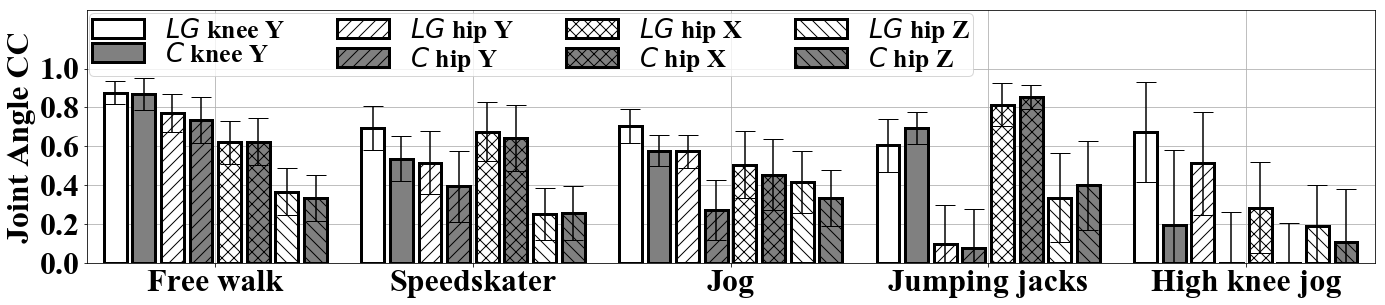

In [44]:
fig, ax2 = plt.subplots(1, figsize=(20, 5))

barchart(ax2, df_plot3, 'CorrCoef')
ax2.set_ylabel('Joint Angle CC')
ax2.set_yticks(np.arange(0, 1.01, step=0.2))
ax2.set_ylim(0, 1.3)
ax2.grid(True)
ax2.legend(loc=2, ncol=4, borderpad=0.1, borderaxespad=0.1, labelspacing=0., prop={'size': 26})

fig.tight_layout(h_pad=0)
fig.savefig('lgcekf-kneehiprmsecc-bw3.png', dpi=300, transparent=False, bbox_inches='tight', pad_inches=0)

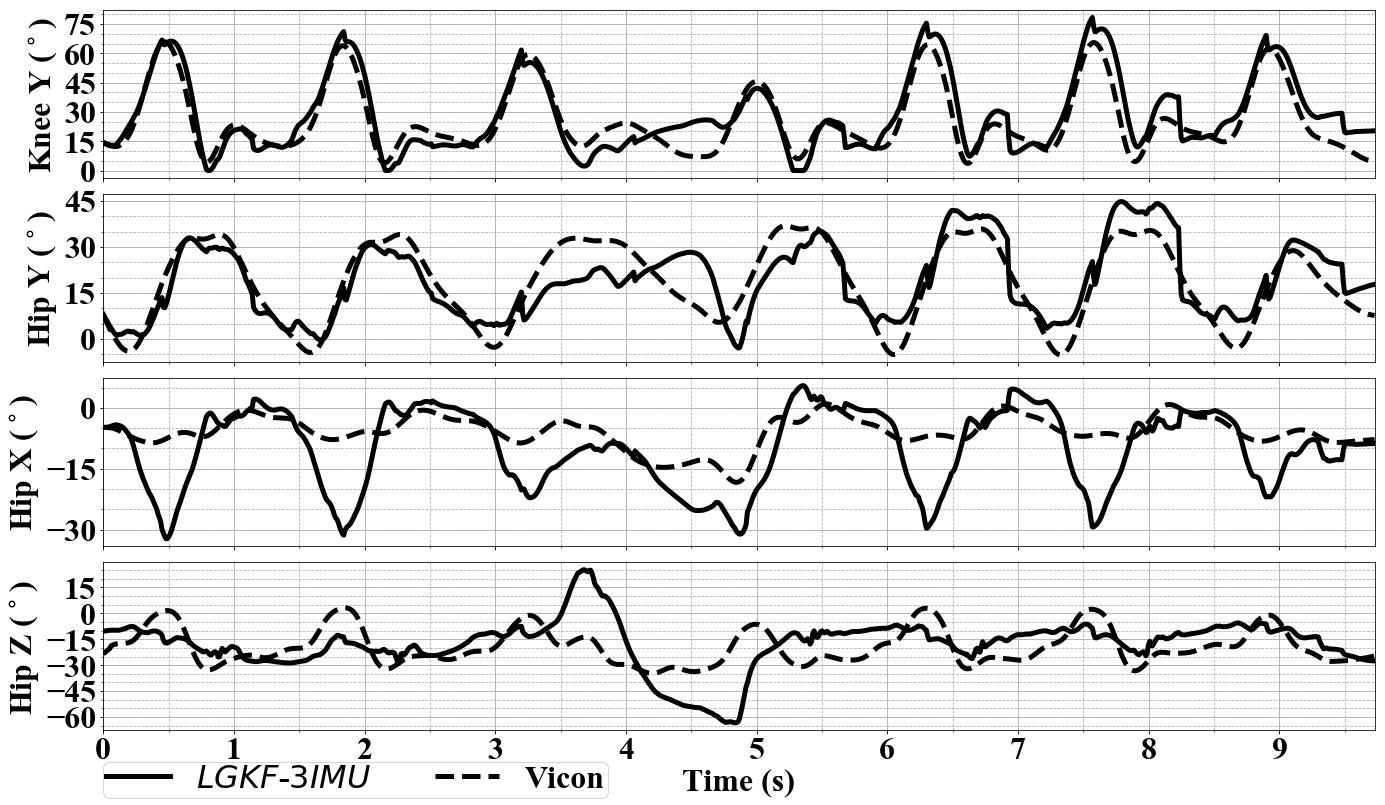

In [46]:
df = pd.read_csv("lgcekf-samplequanlitative.csv")

plt.rc('font', family='Times New Roman', size=32)

fig, ax = plt.subplots(4, figsize=(20, 12))
width = 5

lList = ["Knee Y ($^\circ$)", "Hip Y ($^\circ$)", "Hip X ($^\circ$)", "Hip Z ($^\circ$)"]
vList = ['$\it{LGKF}$-$\it{3IMU}$', 'Vicon']
hList = ['', '']
t = np.arange(df.shape[0])/100

for i in range(0,4):
    ax[i].plot(t, df.iloc[:,i], 'k-', linewidth=width, label=vList[0])
    ax[i].plot(t, df.iloc[:,4+i], 'k--', linewidth=width, label=vList[1])
    ax[i].set_ylabel(lList[i])
    ax[i].grid(True, which='major', linestyle='-', zorder=0)
    ax[i].grid(True, which='minor', linestyle='--')
    
    ax[i].xaxis.set_major_locator(plt.MultipleLocator(1))
    ax[i].xaxis.set_minor_locator(plt.MultipleLocator(0.5))
    
    ax[i].yaxis.set_major_locator(plt.MultipleLocator(15))
    ax[i].yaxis.set_minor_locator(plt.MultipleLocator(5))
    
    if i!=3:
        ax[i].set_xticklabels([])
        
    ax[i].set_xlim([t[0], t[-1]])
    
    (ymin, ymax) = ax[i].get_ylim()
    # ax[i].setp(ax[3].get_xticklabels(), visible=False)
    #ax2.legend(loc=2, ncol=3, borderpad=0.1, borderaxespad=0.1, labelspacing=0.1, columnspacing=0.5)
ax[-1].set_xlabel("Time (s)")
ax[-1].legend(bbox_to_anchor=(0., -0.4, 0., 0.0), loc='lower left',
           ncol=2, borderaxespad=0., borderpad=0.1, labelspacing=0.0)

fig.tight_layout(h_pad=0)
fig.savefig('lgcekf-kneehip-angle-sample.png', dpi=300, transparent=False, bbox_inches='tight', pad_inches=0)